### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

## Summary of the project

We've analyzed the Bitcoin dataset and how different variables affect its market price. The document is structured in:

###### 1) Summary of the project

###### 2) Retrieving packages and datasets

###### 3) Cleaning the data and exploratory data analysis: 
   In this section we've applied the following activities: Analyzed graphically the dataset, find variables with missing values, set index the "Date" variable, impute the data with the back fill method, use Lasso for feature selection, define the X and y matrices after feature selection, apply the train_test_split function and scale the data.  

###### 4) Data modeling: 
   In this section we've applied Knearest Neighbors, Linear Regression, Lasso Regresion, Ridge Regression, Polynomial regression with degree 2, Support Vector Regression and Kernelized Suport Vector Regression.
   
   For every model we've applied gridsearchCV (If the model required parameters), apply the models with train and test datasets, and create some reports about the prediction (Prediction for train, test and in the new data: test_set)


###### 5) Model comparison
   For this section we've tried to create a resume of the predictions for each model and the Mean Square Error (MSE) as a measure to compare them.

###### 6) Final conclusions

  We've found that the best performance in the model is Linear regression.
    
  We concluded that this project required further analysis. It would be important to analyze with time series analysis techniques. Moreover, it could be more insights using the dataset from 2017 were the price started to rise strongly.

## 2. Retrieving packages and datasets

In [243]:
#Retrieving basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn #To retrieve missing data
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [244]:
#Retrieving skicit packages
#For modelling
from sklearn.linear_model import LinearRegression, Lasso, Ridge  #Retrieving regression packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics


#From preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#From model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#From metrics
from sklearn.metrics import mean_squared_error



In [245]:
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

## 3. Data Cleaning and exploratory analysis

In [246]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [247]:
data.shape

(2906, 24)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [249]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


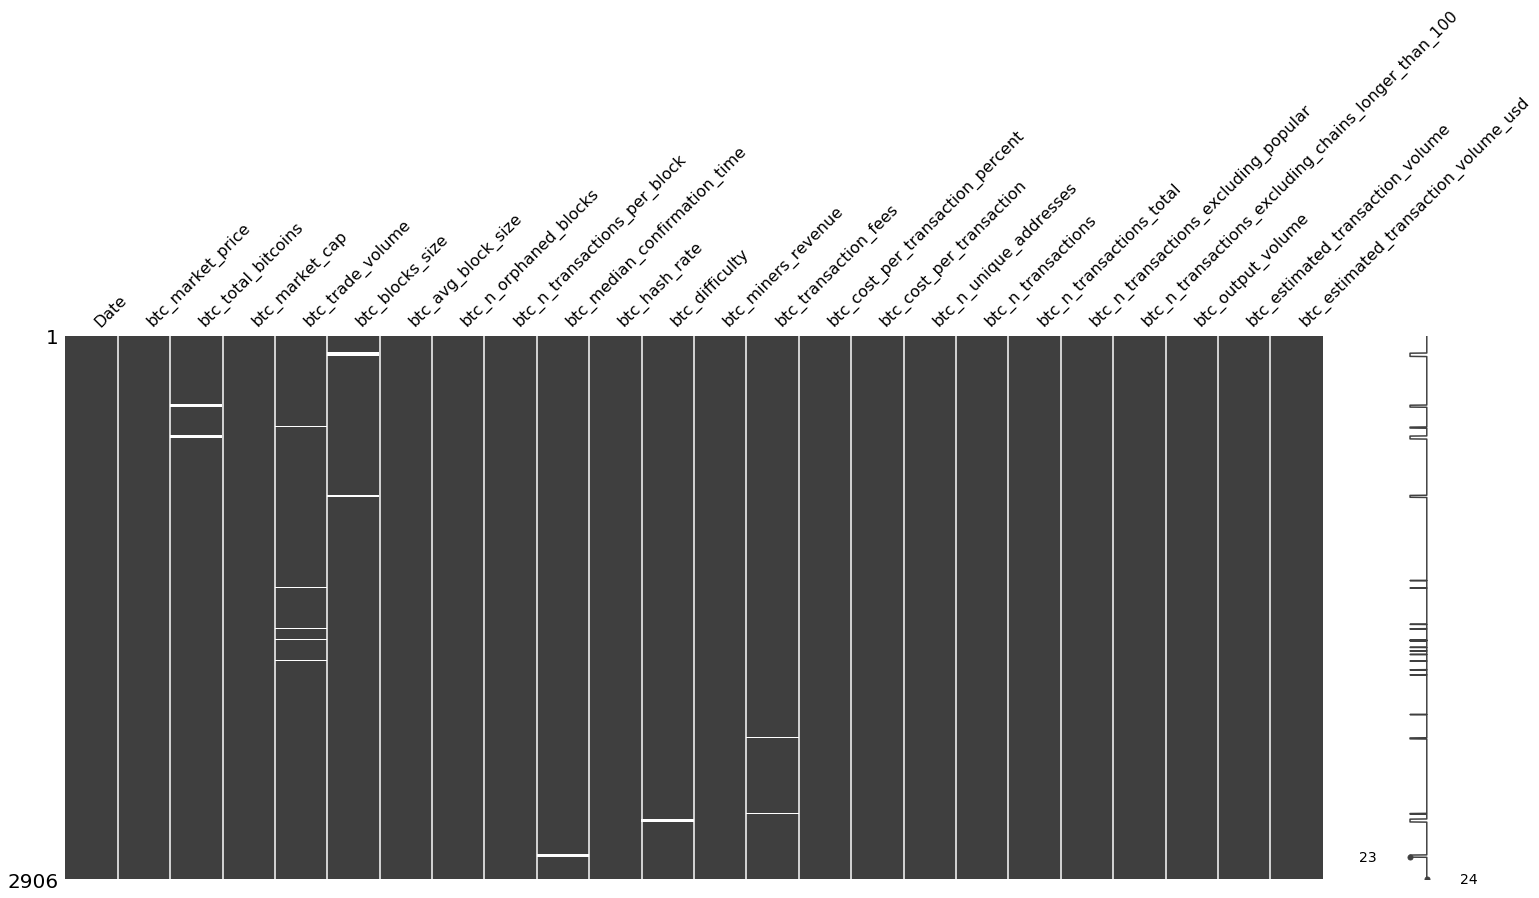

In [250]:
#To check missing values
msn.matrix(data)

### 3.1 Seting index for dataframes: "data" and "test

In [251]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [252]:
data.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [253]:
test["Date"]=pd.to_datetime(test["Date"])
test.set_index("Date", inplace=True)

In [254]:
test.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,2.603080e+12,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
2018-02-02,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,2.603080e+12,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2018-02-03,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,2.603080e+12,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
2018-02-04,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,2.603080e+12,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
2018-02-05,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,2.603080e+12,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


### 3.2 Exploring data and filling null values

- In this step, we visualized features with null values and found their values increase as time goes by. So it is make sense to use 'backfill' method to fill the null values.

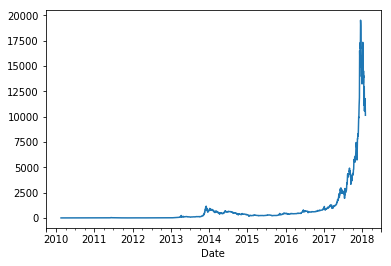

In [255]:
#Exploring the dependent variable (Market price)
data.btc_market_price.plot()

#### 1.btc_total_bitcoins

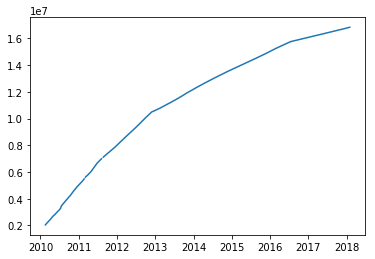

In [256]:
plt.plot(data.index,'btc_total_bitcoins',data=data)

In [257]:
data['btc_total_bitcoins'].fillna(method='backfill',inplace=True)

#### 2.btc_trade_volume

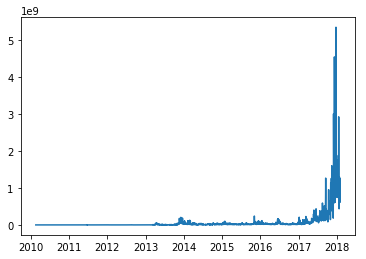

In [258]:
plt.plot(data.index,'btc_trade_volume',data=data)

In [259]:
data['btc_trade_volume'].fillna(method='backfill',inplace=True)

#### 3.btc_blocks_size

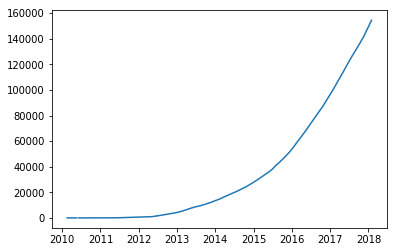

In [260]:
plt.plot(data.index,'btc_blocks_size',data=data)

In [261]:
data['btc_blocks_size'].fillna(method='backfill',inplace=True)

#### 4.btc_median_confirmation_time

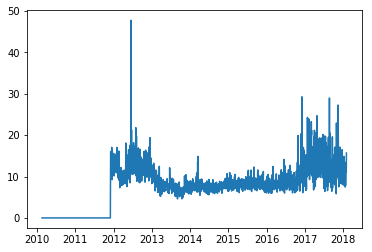

In [262]:
plt.plot(data.index,'btc_median_confirmation_time',data=data)

In [263]:
data['btc_median_confirmation_time'].fillna(method='backfill',inplace=True)

#### 5.btc_difficulty

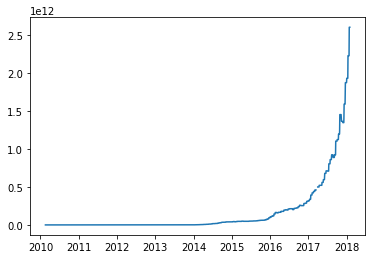

In [264]:
plt.plot(data.index,'btc_difficulty',data=data)

In [265]:
data['btc_difficulty'].fillna(method='backfill',inplace=True)

#### 6.btc_transaction_fees

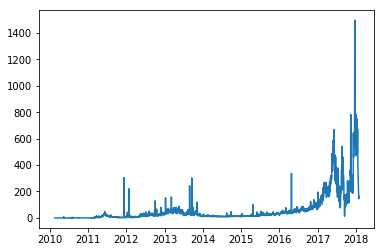

In [266]:
plt.plot(data.index,'btc_transaction_fees',data=data)

In [267]:
data['btc_transaction_fees'].fillna(method='backfill',inplace=True)

### 3.3 Feature Selection with Lasso

In [268]:
# y=data2[['btc_market_price']]
yfeat=data['btc_market_price']
Xfeat=data.loc[:,'btc_total_bitcoins':]

In [269]:
Xtrain_feat, Xtest_feat, ytrain_feat, ytest_feat=train_test_split(Xfeat, 
                                                                  yfeat, test_size=0.2, random_state=10)

In [270]:
#Scaling dataframe: "data"
minmax_scaler=MinMaxScaler()
Xtrain_mms_feat=minmax_scaler.fit_transform(Xtrain_feat)
Xtest_mms_feat=minmax_scaler.transform(Xtest_feat)

In [271]:
linlasso_grid_feature=Lasso()
param_grid_feature={"alpha":[0.5, 1, 2, 3, 5, 10, 20, 50],
           "max_iter":[100,1000,10000]}
grid_lasso_feature=GridSearchCV(linlasso_grid_feature, param_grid_feature, cv=5)

In [272]:
grid_lasso_feature.fit(Xtrain_mms_feat, ytrain_feat)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [273]:
train_score_feature=pd.DataFrame(grid_lasso_feature.cv_results_["mean_train_score"], columns=["mean_train_score"])
test_score_feature=pd.DataFrame(grid_lasso_feature.cv_results_["mean_test_score"], columns=["mean_test_score"])
alpha_lasso_feature=pd.DataFrame(grid_lasso_feature.cv_results_["param_alpha"], columns=["param_alpha"])

#converting the dataframe
lasso_scores_feature=pd.concat([train_score_feature, test_score_feature, alpha_lasso_feature], axis=1)


In [274]:
print("Best K: {}".format(grid_lasso_feature.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso_feature.best_score_))
print("Best estimator:\n{}".format(grid_lasso_feature.best_estimator_))

Best K: {'alpha': 0.5, 'max_iter': 100}
Best cross-validation score: 0.9999
Best estimator:
Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [275]:
linlasso_feature = Lasso(alpha=0.5, max_iter = 100).fit(Xtrain_mms_feat, ytrain_feat)

#The prediction is
ypredicttrain_lasso_feat=linlasso_feature.predict(Xtrain_mms_feat)


print('Bitcoin')
print('lasso regression linear model intercept: {}'
     .format(linlasso_feature.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso_feature.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso_feature.coef_ != 0)))
print('R-squared score (training): {:.5f}'
     .format(linlasso_feature.score(Xtrain_mms_feat, ytrain_feat)))
print('R-squared score (test): {:.5f}\n'
     .format(linlasso_feature.score(Xtest_mms_feat, ytest_feat)))
print("The SSE is: {:.5f}".format(metrics.mean_squared_error(ypredicttrain_lasso_feat, ytrain_feat)))


Bitcoin
lasso regression linear model intercept: -11.376323594064957
lasso regression linear model coeff:
[  9.66879001e+00   1.87044392e+04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.62065963e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.21016161e+01   0.00000000e+00
   0.00000000e+00   5.41413334e+02   8.69583576e+01   0.00000000e+00
   4.93707737e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   1.21193540e+02]
Non-zero features: 8
R-squared score (training): 0.99992
R-squared score (test): 0.99986

The SSE is: 468.73477


##### The selected features are:

In [276]:
#Selecting the featured variables
for e in sorted (list(zip(list(Xtrain_feat), linlasso_feature.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.2f}'.format(e[0], e[1]))

	btc_market_cap, 18704.44
	btc_cost_per_transaction, 541.41
	btc_estimated_transaction_volume_usd, 121.19
	btc_n_unique_addresses, 86.96
	btc_miners_revenue, 52.10
	btc_total_bitcoins, 9.67
	btc_n_transactions_per_block, 7.62
	btc_n_transactions_total, 4.94


### 3.4 Defining the X, y matrices after feature selection

In [277]:
# y=data2[['btc_market_price']]
y=data['btc_market_price']
X=data.loc[:,["btc_market_cap", "btc_cost_per_transaction", "btc_estimated_transaction_volume_usd", 
             "btc_n_unique_addresses", "btc_miners_revenue", "btc_total_bitcoins", 
              "btc_n_transactions_per_block", "btc_n_transactions_total"]]

test_reduced=test.loc[:,["btc_market_cap", "btc_cost_per_transaction", "btc_estimated_transaction_volume_usd", 
             "btc_n_unique_addresses", "btc_miners_revenue", "btc_total_bitcoins", 
              "btc_n_transactions_per_block", "btc_n_transactions_total"]]

### 3.5 Train_test split

In [278]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2, random_state=10)

In [279]:
print("The shape of x is: ", X.shape)
print("The shape of xtrain is: ", Xtrain.shape)
print("The shape of ytrain is: ", ytrain.shape)
print("The shape of xtest is: ", Xtest.shape)
print("The shape of ytest is: ", ytest.shape)

The shape of x is:  (2906, 8)
The shape of xtrain is:  (2324, 8)
The shape of ytrain is:  (2324,)
The shape of xtest is:  (582, 8)
The shape of ytest is:  (582,)


### 3.6 Data scaling (minmax_scaler)

In [280]:
#Scaling dataframe: "data"
minmax_scaler=MinMaxScaler()
Xtrain_mms=minmax_scaler.fit_transform(Xtrain)
Xtest_mms=minmax_scaler.transform(Xtest)

In [281]:
#Scaling dataframe: "test"
X_testset_mms=minmax_scaler.transform(test_reduced)

## 4. Data Modelling

### 4.1 K-Nearest Neighbors

For data modelling we decide to use MinMax Scaler

### 4.1.1 Using Grid Search to find the best k for K-NN

In [282]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Setting range of k
param_grid = {'n_neighbors': list(range(1,16,2))}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid_search.fit(Xtrain_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [283]:
print("Best K: {}".format(grid_search.best_params_))
print("Best cross-validation R square: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best K: {'n_neighbors': 3}
Best cross-validation R square: 0.9966
Best estimator:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')


0.995067037981 0.995226399825
0.996583753527 0.993945869435
0.996092999705 0.994395140422
0.99553782259 0.993530920602
0.995110749663 0.994056145327
0.994649513178 0.993231268922
0.994070784651 0.993487907691
0.993605833658 0.99424767511


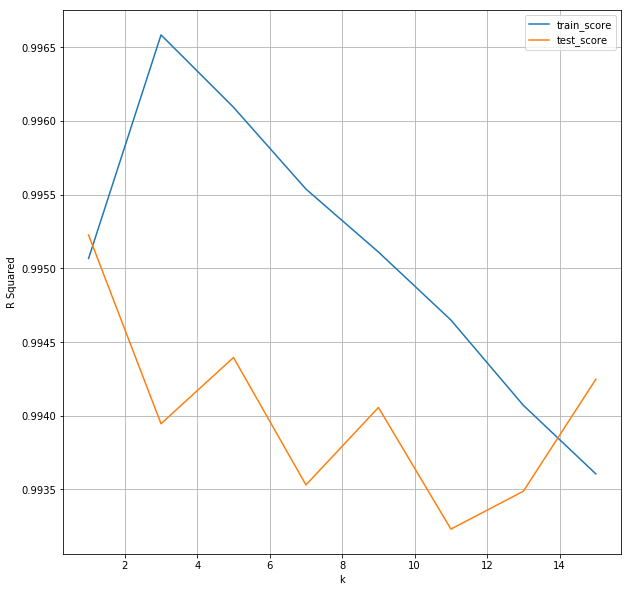

In [284]:
cv_scores = []
K_NN=pd.DataFrame(columns=['k','train_score', 'test_score'])



myList = list(range(1,16))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
# neighbors

i=0
# perform 5-fold cross validation
for k in neighbors:
#     print(k)
    knn = KNeighborsRegressor(n_neighbors=k).fit(Xtrain_mms, ytrain)
    train_score = cross_val_score(knn, Xtrain_mms, ytrain, cv=5).mean()
#     test_score = cross_val_score(knn, Xtest_mms, ytest, cv=5).mean()
    test_score = knn.score(Xtest_mms, ytest)
    K_NN.loc[i]=[k, train_score, test_score]
    print(train_score,test_score)
    i=i+1
    
fig, ax =plt.subplots(figsize=(10,10))

ax.plot('k', 'train_score', label='train_score',data=K_NN)
ax.plot('k', 'test_score', label='test_score',data=K_NN)
ax.set_xlabel('k')
ax.set_ylabel('R Squared')
ax.grid(True)
ax.legend()

 - The Best Parameter Getting from Grid Search for K-NN is n_neighbor=5

##### Using the best k neighbor(k=3) and train data set to build the model and using test data set to validate how good the model is.

### 4.1.2 Build model with best parameter

In [285]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(Xtrain_mms, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [286]:
print('R-Squared Score (test): {:.4f}'.format(knn.score(Xtest_mms, ytest)))
print('Root Mean Squared Error (test): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(knn.predict(Xtest_mms), ytest))))

R-Squared Score (test): 0.9939
Root Mean Squared Error (test): 136.5220


### 4.1.3 Prediction Knearest Neigborhs

In [287]:
def predict_compare(model, x, y, label):
    label='Comparing Predicted BitCoin Price and Real BitCoin Price'+' \n('+label+')'
    y_predict=model.predict(x)
    y_predict=pd.DataFrame(y_predict)
    y=y.reset_index()
    compare=pd.concat([y, y_predict], axis=1)
    compare=compare.sort_values(by='Date')
    compare=compare.rename(columns={0:'Predicted_y'})
    plt.figure(figsize=(20,10))
    plt.plot(compare['Date'], compare['btc_market_price'], label='btc_market_price', color='black', alpha=0.6)
    plt.plot(compare['Date'], compare['Predicted_y'], label='Predicted_Price', color='r', alpha=0.4)
    plt.suptitle(label,size='x-large')
    plt.ylabel('BotCoin Price',size='large')
    plt.xlabel('Time',size='large')
    plt.grid(True)
    plt.legend()
    plt.show()
    return compare

#### Graph comparing real BitCion price and predicted BitCoin price using K-NN in Train Dataset

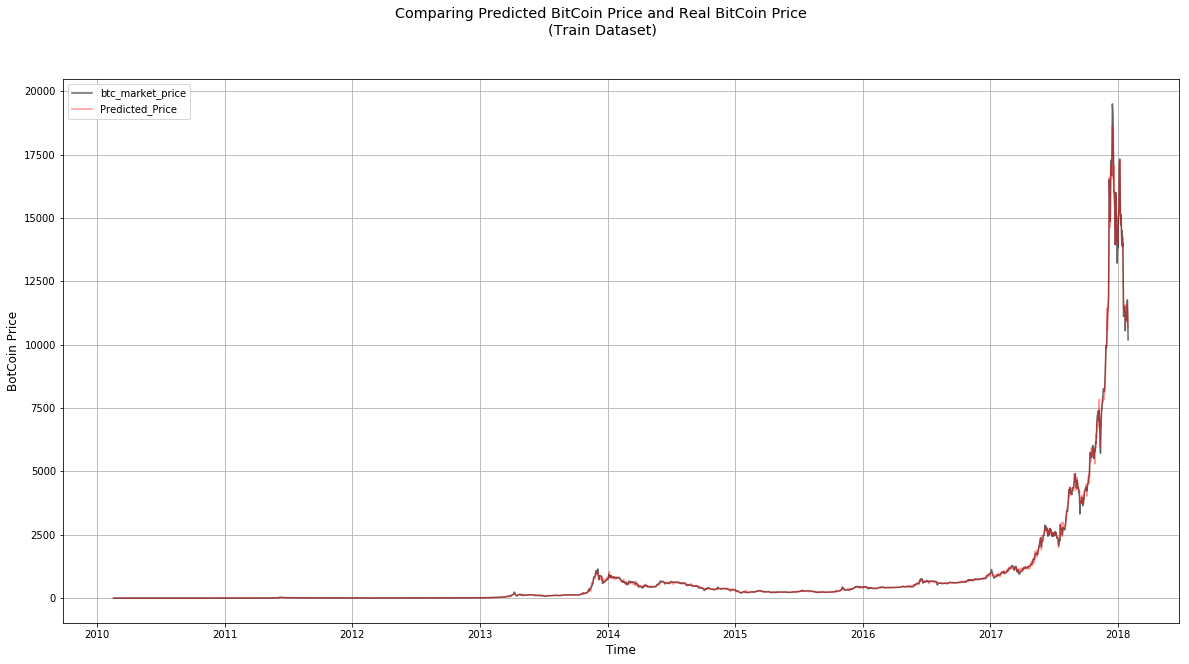

In [288]:
ycompareknn=predict_compare(knn, Xtrain_mms, ytrain, 'Train Dataset')

##### Graph comparing real BitCion price and predicted BitCoin price using K-NN in Test Dataset

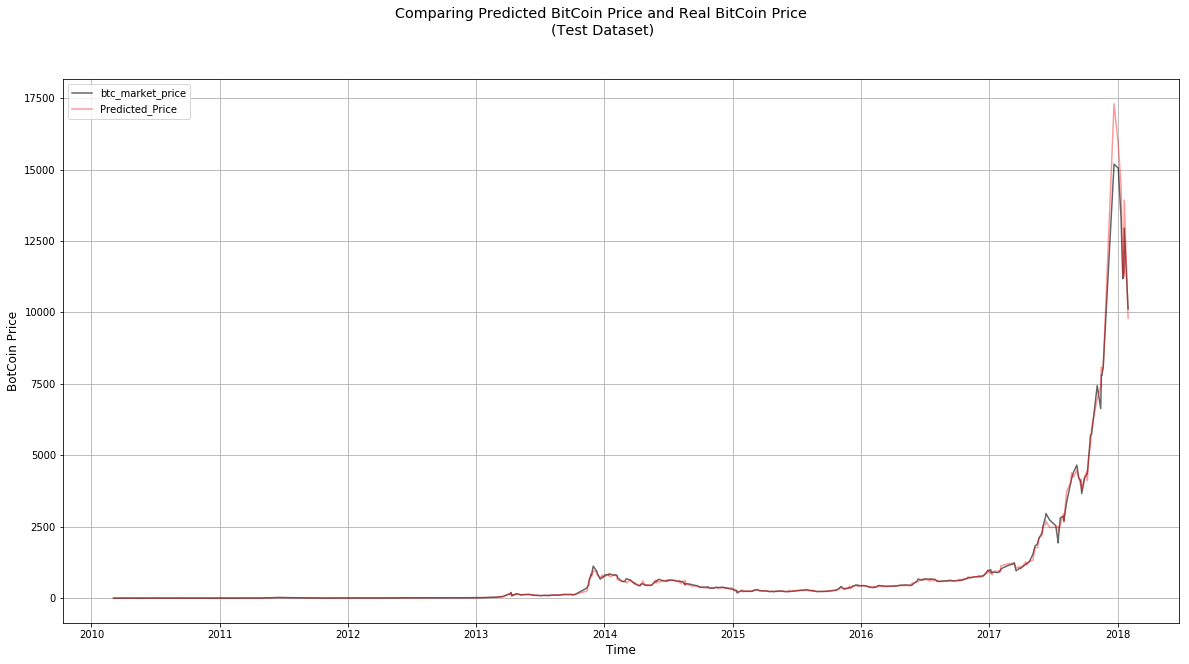

In [289]:
ycompareknn2=predict_compare(knn, Xtest_mms, ytest, 'Test Dataset')

#### Predicting the values in test_set for linear regression

In [290]:
test2=test.reset_index()

In [291]:
def predict_test(model, xtest):
    y_predict=model.predict(xtest)
    predict_test=pd.DataFrame({'Date':test2['Date'], 'predicted_BitCoin_Price':y_predict})
    return predict_test

In [292]:
y_predict_testset_knn=predict_test(knn, X_testset_mms)
y_predict_testset_knn

,Date,predicted_BitCoin_Price
0,2018-02-01,9801.456912
1,2018-02-02,10909.616110
2,2018-02-03,11054.142223
3,2018-02-04,11158.182780
4,2018-02-05,8028.284718
5,2018-02-06,8028.284718
6,2018-02-07,7092.601617
7,2018-02-08,9801.456912
8,2018-02-09,9801.456912
9,2018-02-10,9801.456912


### 4.1.4 Conclusion
#### K equals to 3 is the best parameter for K-NN model：
* R-Squared Score (test): 0.9939
* Root Mean Squared Error (test): 136.52

### 4.2 Linear Regression

### 4.2.1 Running Linear Regression

In [293]:
linreg = LinearRegression().fit(Xtrain_mms, ytrain)

#The prediction is
ypredicttrain_linear=linreg.predict(Xtrain_mms)

print('Bitcoins')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.5f}'
     .format(linreg.score(Xtrain_mms, ytrain)))
print('R-squared score (test): {:.5f}'
     .format(linreg.score(Xtest_mms, ytest)))

Bitcoins
linear model intercept: -17.609446993763868
linear model coeff:
[  1.88427503e+04   5.59868138e+02   2.19886920e+02   1.41305224e+02
  -1.45945462e+02   2.13288298e+01   1.19130869e+01  -5.94802145e+01]
R-squared score (training): 0.99993
R-squared score (test): 0.99986


### 4.2.2 Cross validation for linear regression

In [294]:
cv_linear=cross_val_score(linreg, Xtrain_mms, ytrain, cv=5)

In [295]:
print("Applying cross validation methods, the R2 are: \n{}".format(cv_linear))

Applying cross validation methods, the R2 are: 
[ 0.99991632  0.99992963  0.99994291  0.99991878  0.99989623]


In [296]:
print("The mean R2 is", np.mean(cv_linear))

The mean R2 is 0.99992077157


### 4.2.3 Prediction in linear regression

##### Graph comparing real BitCion price and predicted BitCoin price using Linear Regression in Train Dataset

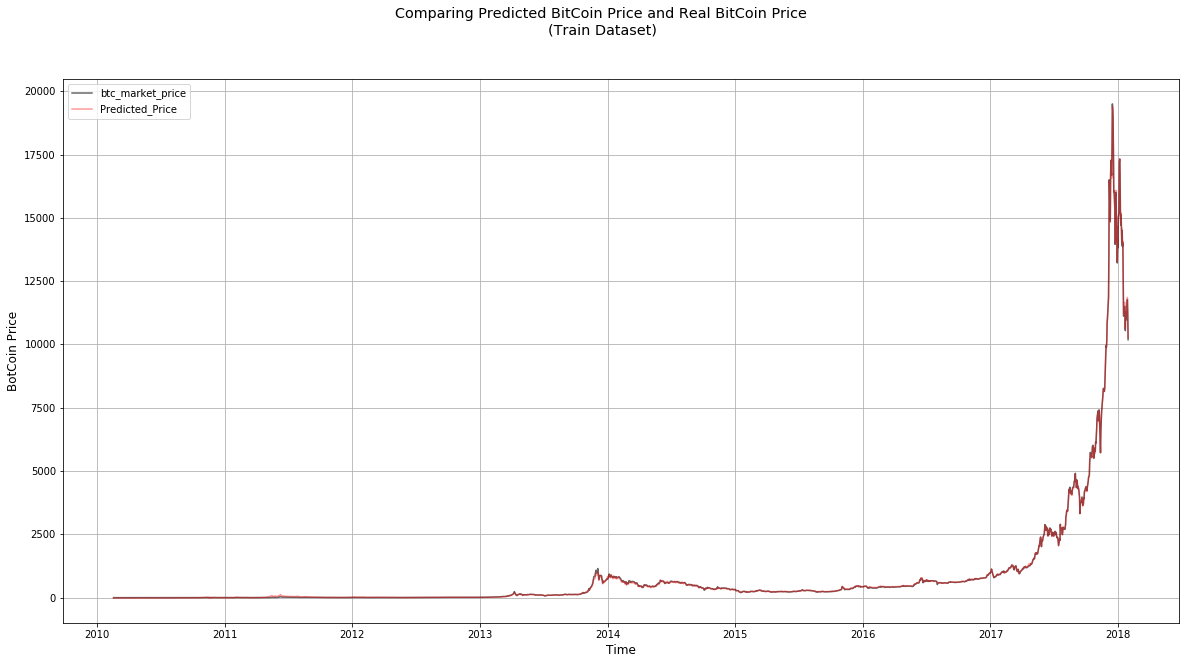

In [297]:
ycompare0=predict_compare(linreg, Xtrain_mms, ytrain, 'Train Dataset')

#### Graph comparing real BitCion price and predicted BitCoin price using Linear regression in Test Dataset

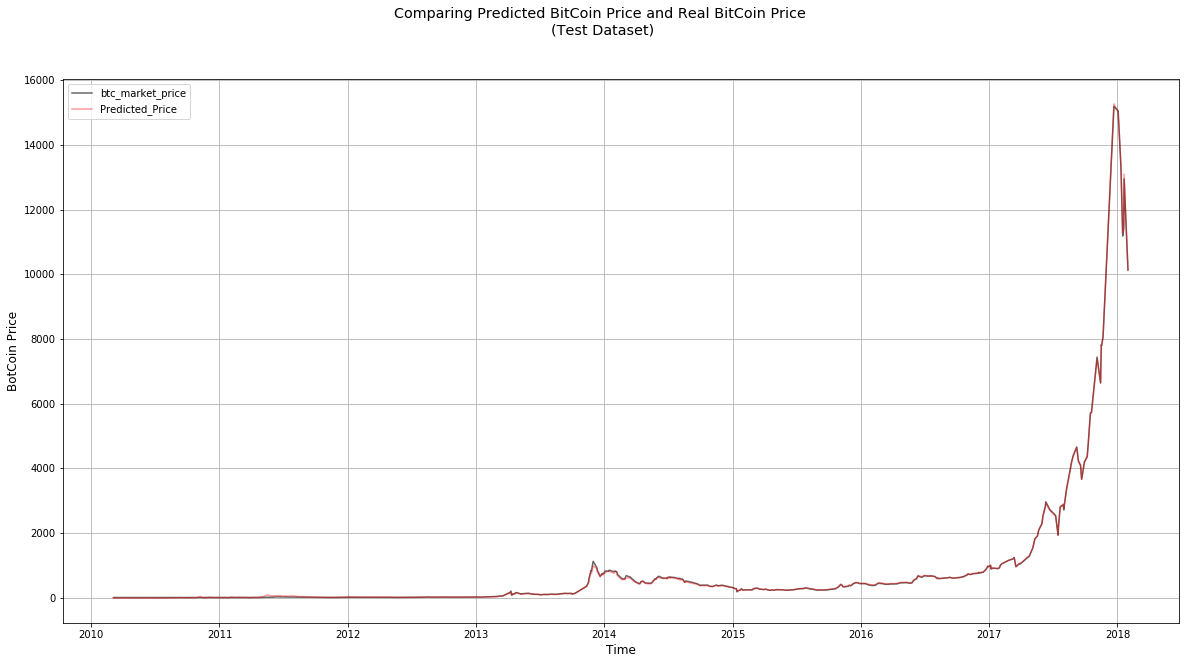

In [298]:
ycompare0b=predict_compare(linreg, Xtest_mms, ytest, 'Test Dataset')

#### Predicting the values in "test_set" for linear regression

In [299]:
y_predict_testset_linear=predict_test(linreg, X_testset_mms)
y_predict_testset_linear

,Date,predicted_BitCoin_Price
0,2018-02-01,9169.140120
1,2018-02-02,9041.275405
2,2018-02-03,9177.652722
3,2018-02-04,8568.007140
4,2018-02-05,6956.379564
5,2018-02-06,7788.188157
6,2018-02-07,8163.490891
7,2018-02-08,8330.437029
8,2018-02-09,8632.617963
9,2018-02-10,8391.022694


### 4.3 Lasso Regression

### 4.3.1 Grid analysis: Optimum alpha for lasso

In [300]:
linlasso_grid=Lasso()
param_grid={"alpha":[0.5, 1, 2, 3, 5, 10, 20, 50],
           "max_iter":[100,1000,10000]}
grid_lasso=GridSearchCV(linlasso_grid, param_grid, cv=5)

In [301]:
grid_lasso.fit(Xtrain_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### The "mean score" for different alphas in Lasso regression are:

In [302]:
train_score=pd.DataFrame(grid_lasso.cv_results_["mean_train_score"], columns=["mean_train_score"])
test_score=pd.DataFrame(grid_lasso.cv_results_["mean_test_score"], columns=["mean_test_score"])
alpha_lasso=pd.DataFrame(grid_lasso.cv_results_["param_alpha"], columns=["param_alpha"])

#converting the dataframe
lasso_scores=pd.concat([train_score, test_score, alpha_lasso], axis=1)


In [303]:
lasso_scores

,mean_train_score,mean_test_score,param_alpha
0,0.999919,0.999914,0.5
1,0.999919,0.999914,0.5
2,0.999919,0.999914,0.5
3,0.999902,0.999896,1
4,0.999902,0.999896,1
5,0.999902,0.999896,1
6,0.999854,0.999847,2
7,0.999854,0.999847,2
8,0.999854,0.999847,2
9,0.999789,0.999781,3


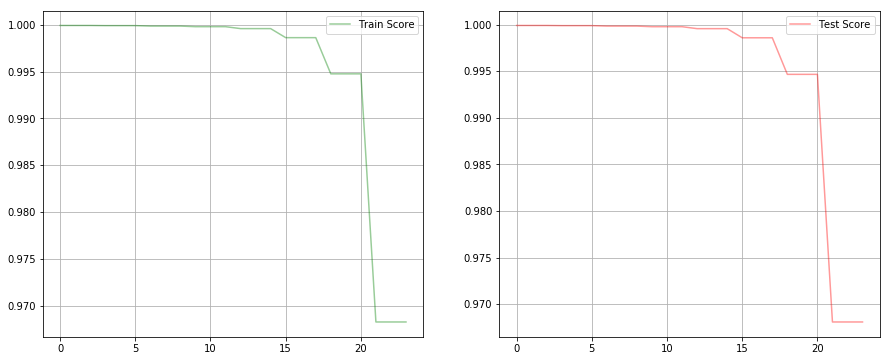

In [304]:
fig, ax =plt.subplots(1, 2,figsize=(15,6))
ax[0].plot(lasso_scores.mean_train_score,label='Train Score', color='green', alpha=0.4)
ax[0].legend()
ax[0].grid(True)
ax[1].plot(lasso_scores.mean_test_score,label='Test Score', color='red', alpha=0.4)
ax[1].legend()
ax[1].grid(True)

#### The best parameters for Lasso regression are:

In [305]:
print("Best K: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso.best_score_))
print("Best estimator:\n{}".format(grid_lasso.best_estimator_))

Best K: {'alpha': 0.5, 'max_iter': 100}
Best cross-validation score: 0.9999
Best estimator:
Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


### 4.3.2 Working with the recommended alpha in lasso regression

In [306]:
linlasso = Lasso(alpha=0.5, max_iter = 100).fit(Xtrain_mms, ytrain)

#The prediction is
ypredicttrain_lasso=linlasso.predict(Xtrain_mms)


print('Bitcoin')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.5f}'
     .format(linlasso.score(Xtrain_mms, ytrain)))
print('R-squared score (test): {:.5f}\n'
     .format(linlasso.score(Xtest_mms, ytest)))
print("The SSE is: {:.5f}".format(metrics.mean_squared_error(ypredicttrain_lasso, ytrain)))


Bitcoin
lasso regression linear model intercept: -12.456362855434463
lasso regression linear model coeff:
[  1.87955058e+04   5.30696574e+02   8.96914711e+01   8.35134255e+01
   0.00000000e+00   1.54537025e+01   6.03449829e+00   0.00000000e+00]
Non-zero features: 6
R-squared score (training): 0.99992
R-squared score (test): 0.99986

The SSE is: 470.97253


##### The selected featured variables are:

In [307]:
#Selecting the featured variables
for e in sorted (list(zip(list(Xtrain), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.2f}'.format(e[0], e[1]))

	btc_market_cap, 18795.51
	btc_cost_per_transaction, 530.70
	btc_estimated_transaction_volume_usd, 89.69
	btc_n_unique_addresses, 83.51
	btc_total_bitcoins, 15.45
	btc_n_transactions_per_block, 6.03


### 4.3.3 Prediction in Lasso Regression

##### 4.3.3.1 Graph comparing real BitCion price and predicted BitCoin price using Lasso Regression in Train Dataset

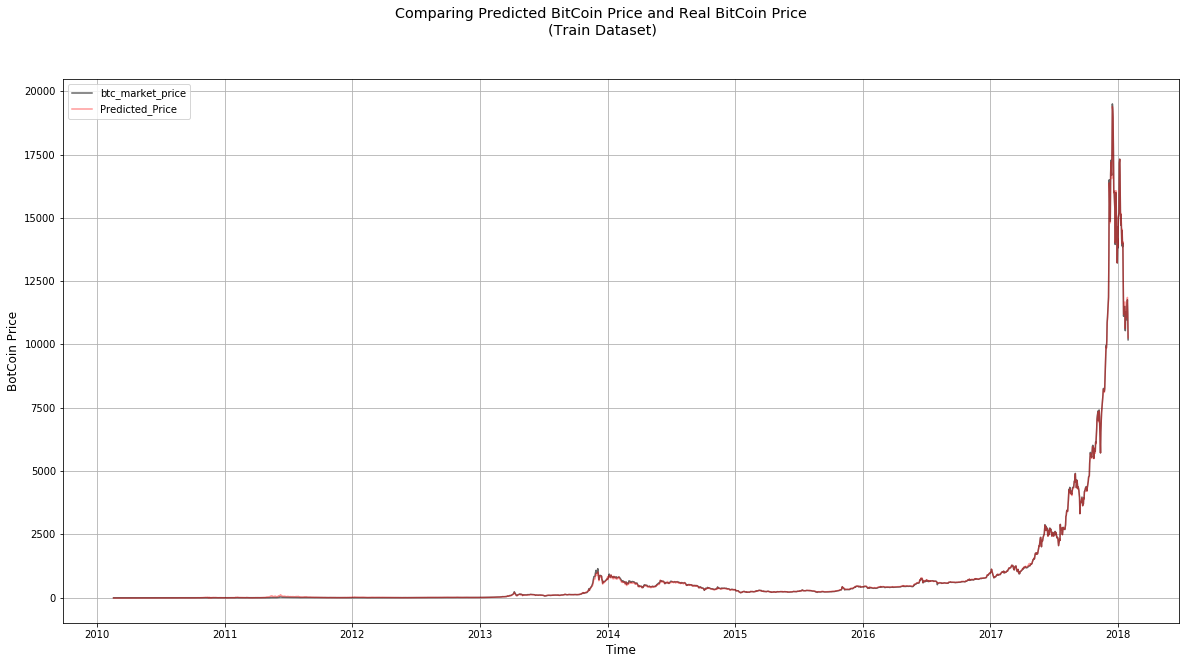

In [308]:
ycompare1=predict_compare(linlasso, Xtrain_mms, ytrain, 'Train Dataset')

##### 4.3.3.2 Graph comparing real BitCion price and predicted BitCoin price using Lasso Regression in Test Dataset

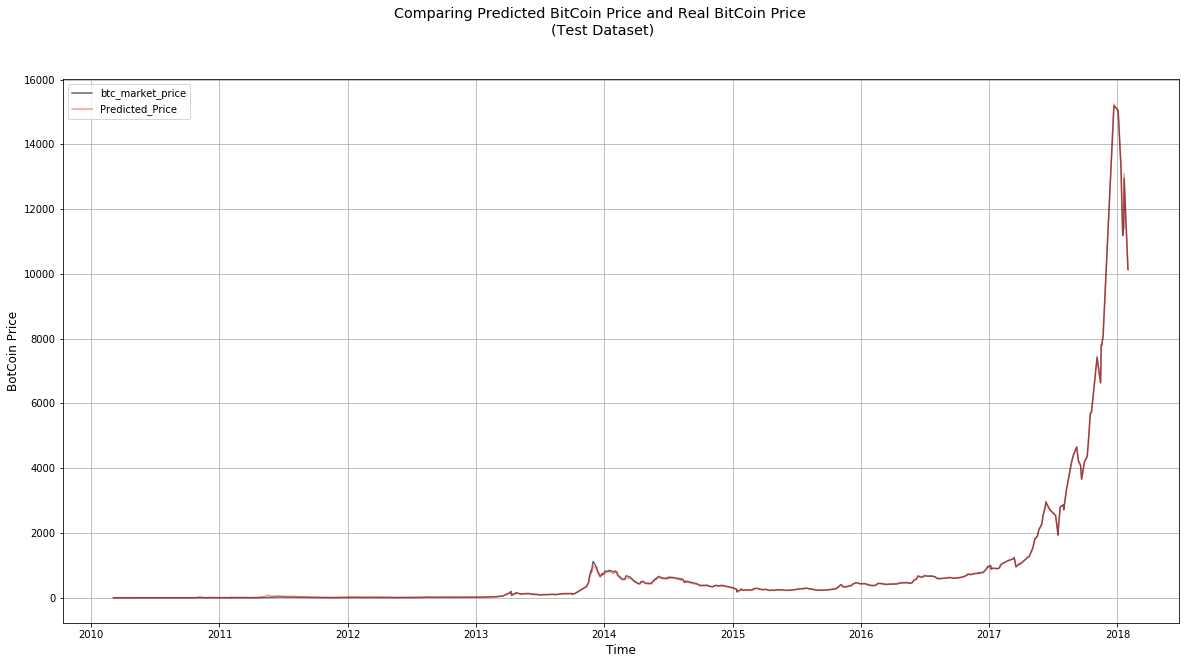

In [309]:
ycompare1b=predict_compare(linlasso, Xtest_mms, ytest, 'Test Dataset')

#### 4.3.3.3 Predicting the values in "test_set" for lasso regression

In [310]:
y_predict_testset_lasso=predict_test(linlasso, X_testset_mms)
y_predict_testset_lasso

,Date,predicted_BitCoin_Price
0,2018-02-01,9152.619220
1,2018-02-02,9018.883914
2,2018-02-03,9187.688252
3,2018-02-04,8578.248496
4,2018-02-05,6961.224079
5,2018-02-06,7777.569685
6,2018-02-07,8162.699666
7,2018-02-08,8328.289836
8,2018-02-09,8629.674419
9,2018-02-10,8408.722356


### 4.4 Ridge Regression

### 4.4.1 Grid analysis: optimum alpha for Ridge Regression

In [311]:
linridge_grid=Ridge()
param_grid2={"alpha":[0.5, 1, 2, 3, 5, 10, 20, 50]}
grid_ridge=GridSearchCV(linridge_grid, param_grid2, cv=5)

In [312]:
grid_ridge.fit(Xtrain_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### The "mean score" for different alphas in Ridge regression are:

In [313]:
ridgedataframe=pd.DataFrame(grid_ridge.cv_results_)
ridgedataframe.iloc[:,2:5]

,mean_test_score,mean_train_score,param_alpha
0,0.997783,0.997903,0.5
1,0.996212,0.996413,1
2,0.993552,0.993879,2
3,0.991180,0.991601,3
4,0.986816,0.987365,5
5,0.976328,0.977004,10
6,0.953641,0.954316,20
7,0.880502,0.880974,50


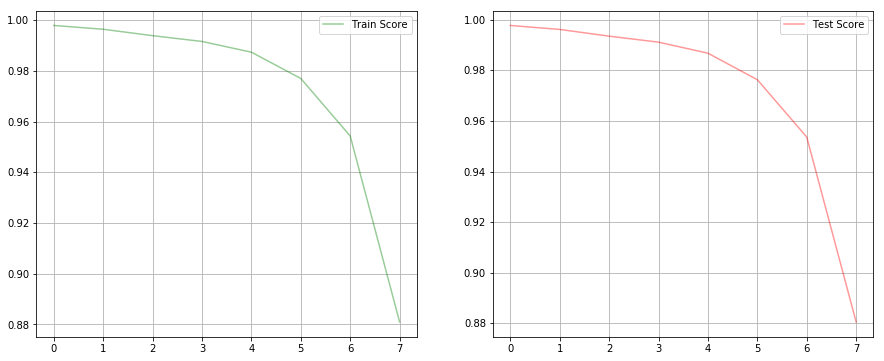

In [314]:
fig, ax =plt.subplots(1, 2,figsize=(15,6))
ax[0].plot(ridgedataframe.mean_train_score,label='Train Score', color='green', alpha=0.4)
ax[0].legend()
ax[0].grid(True)
ax[1].plot(ridgedataframe.mean_test_score,label='Test Score', color='red', alpha=0.4)
ax[1].legend()
ax[1].grid(True)

##### The best parameters for Ridge regression are:

In [315]:
print("Best K: {}".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ridge.best_score_))
print("Best estimator:\n{}".format(grid_ridge.best_estimator_))

Best K: {'alpha': 0.5}
Best cross-validation score: 0.9978
Best estimator:
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


### 4.4.2 Working with chosen alpha in Ridge regression

In [316]:
linridge = Ridge(alpha=0.5).fit(Xtrain_mms, ytrain)
#The prediction is
ypredicttrain_ridge=linridge.predict(Xtrain_mms)

print('Bitcoin')   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(Xtrain_mms, ytrain)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(Xtest_mms, ytest)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Bitcoin
ridge regression linear model intercept: 24.558634429404606
ridge regression linear model coeff:
[ 11168.69806431    728.98335246   2618.90363088  -1044.73367205
   5520.45177411   -166.50222362     76.89628542   1070.19909178]
R-squared score (training): 0.998
R-squared score (test): 0.996
Number of non-zero features: 8


### 4.4.3 Prediction in Ridge Regression

##### Graph comparing real BitCion price and predicted BitCoin price using Ridge Regression in Train Dataset 

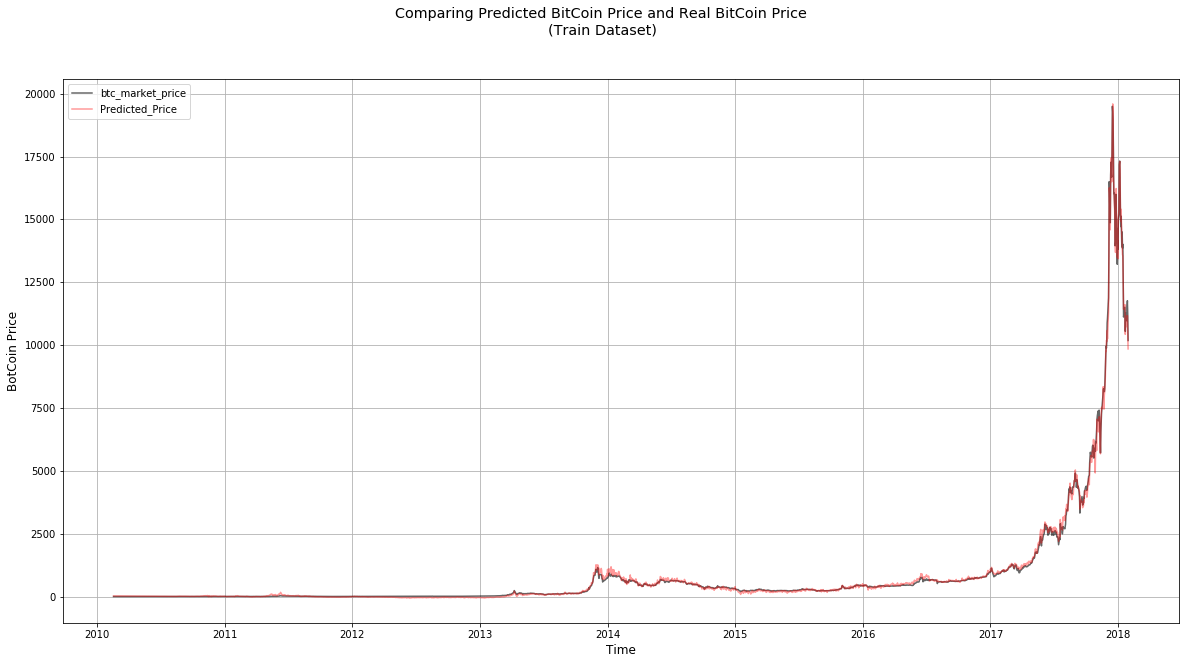

In [317]:
ycompare2=predict_compare(linridge, Xtrain_mms, ytrain, 'Train Dataset')

##### Graph comparing real BitCion price and predicted BitCoin price using Ridge Regression in Test Dataset 

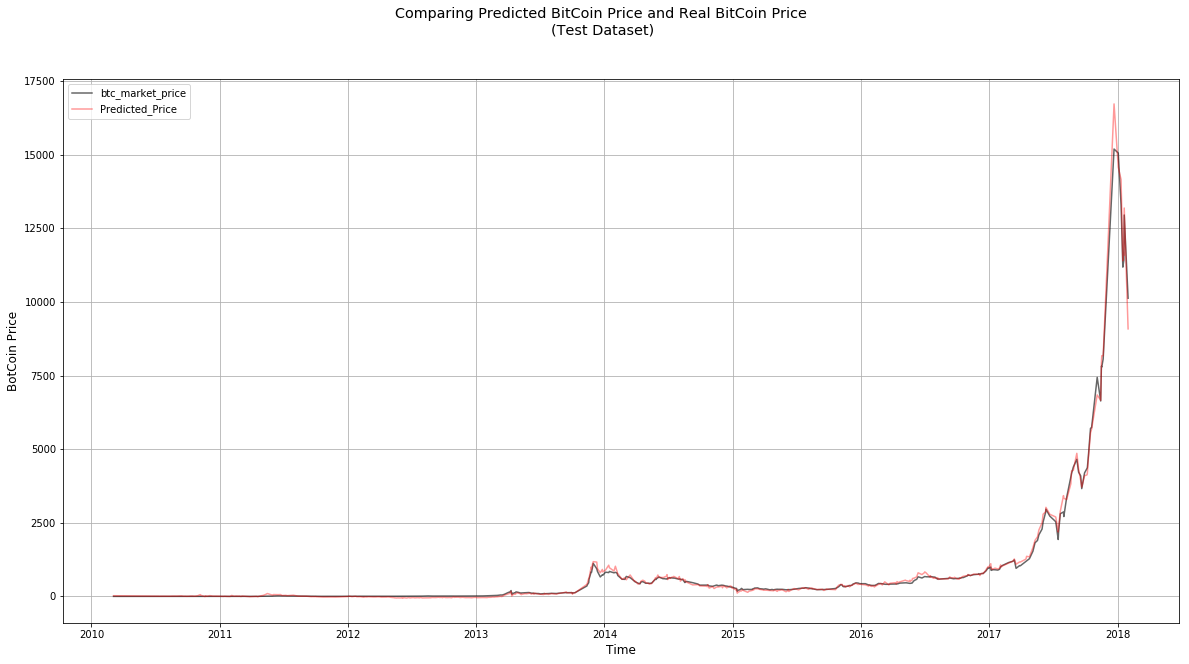

In [318]:
ycompare2b=predict_compare(linridge, Xtest_mms, ytest, 'Test Dataset')

#### Predicting the values in "test_set" for ridge regression

In [319]:
y_predict_testset_ridge=predict_test(linridge, X_testset_mms)
y_predict_testset_ridge

,Date,predicted_BitCoin_Price
0,2018-02-01,9132.860359
1,2018-02-02,9416.288306
2,2018-02-03,8821.224350
3,2018-02-04,8639.645281
4,2018-02-05,7294.946777
5,2018-02-06,7918.737215
6,2018-02-07,7790.774095
7,2018-02-08,7937.184439
8,2018-02-09,8126.387379
9,2018-02-10,7758.508973


### 4.5 Polynomial Regression

### 4.5.1 2-Degree Polynomial

##### Inserting Polynomial Features

In [320]:
polinomios2 = PolynomialFeatures(degree=2)
X_poly = polinomios2.fit_transform(X) #To fit a new scaling
# X_poly2=minmax_scaler.transform(X)  #We can not use transform because it has more columns (276 instead of 22)


In [321]:
# Subsetting
Xtrain2, Xtest2, ytrain2, ytest2=train_test_split(X_poly, y, test_size=0.2, random_state=10)
print("The new shape of polynomial data is: ",Xtrain2.shape)

The new shape of polynomial data is:  (2324, 45)


##### Scaling the data

In [322]:
Xtrain2_mms=minmax_scaler.fit_transform(Xtrain2)
Xtest2_mms=minmax_scaler.transform(Xtest2)

##### Running the regression

In [323]:
linlasso_pol2 = Lasso(alpha=5).fit(Xtrain2_mms, ytrain2)

print('(poly deg 2 + lasso) linear model coeff :\n{}'
     .format(linlasso_pol2.coef_))
print('(poly deg 2 + lasso) linear model intercept (b): {}'
      .format(linlasso_pol2.intercept_))
print('(poly deg 2 + lasso) R-squared score (training): {:.5f}'
      .format(linlasso_pol2.score(Xtrain2_mms, ytrain2)))
print('(poly deg 2 + lasso) R-squared score (test): {:.5f}'
      .format(linlasso_pol2.score(Xtest2_mms, ytest2)))

(poly deg 2 + lasso) linear model coeff :
[  0.00000000e+00   1.83674252e+04   4.89136024e+02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.31162792e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.95765976e+01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.85360000e+02]
(poly deg 2 + lasso) linear model intercept (b): 9.768158716279004
(poly deg 2 + lasso) R-squared score (training): 0.99956
(poly deg 2 + lasso) R-squared score (test): 0.99965


### 4.5.2 Prediction in polynomial regression

##### Graph comparing real BitCion price and predicted BitCoin price using polynomial Regression in Train Dataset 

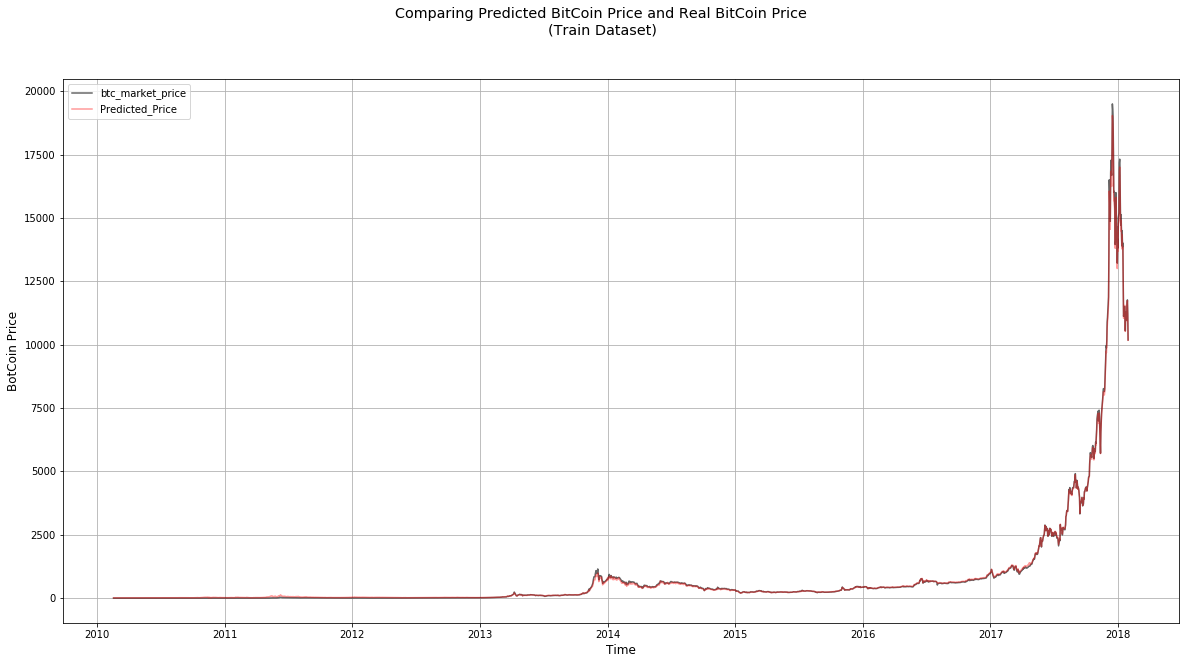

In [324]:
ycompare3=predict_compare(linlasso_pol2, Xtrain2_mms, ytrain2, 'Train Dataset')

##### Graph comparing real BitCion price and predicted BitCoin price using polynomial Regression in Test Dataset 

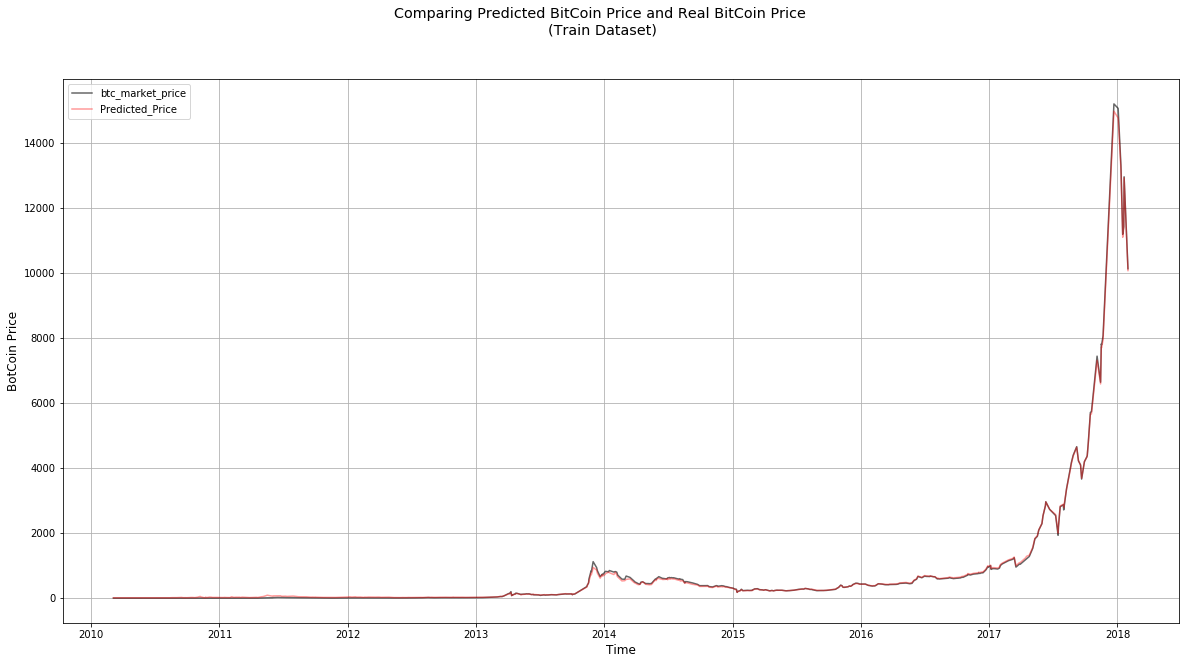

In [325]:
ycompare3b=predict_compare(linlasso_pol2, Xtest2_mms, ytest2, 'Train Dataset')

#### Predicting the values in "test_set" for polynomial regression

In [326]:
# #To transform in polynomial the testset
X_poly_testset = polinomios2.fit_transform(test_reduced)
# To scale the testset
X_poly_testset_scaled=minmax_scaler.transform(X_poly_testset)

In [327]:
y_predict_testset_polynomial=predict_test(linlasso_pol2, X_poly_testset_scaled)
y_predict_testset_polynomial

,Date,predicted_BitCoin_Price
0,2018-02-01,9072.442412
1,2018-02-02,8936.483342
2,2018-02-03,9131.682435
3,2018-02-04,8533.593324
4,2018-02-05,6946.626607
5,2018-02-06,7732.917574
6,2018-02-07,8126.006695
7,2018-02-08,8292.630704
8,2018-02-09,8583.686993
9,2018-02-10,8381.712368


### Analyzing with grid search

In [328]:
polinomios2 = PolynomialFeatures(degree=2)
X_poly = polinomios2.fit_transform(X) #To fit a new scaling
#Subsetting
Xtrain2, Xtest2, ytrain2, ytest2=train_test_split(X_poly, y, test_size=0.2, random_state=10)
print("The new shape of polynomial data is: ",Xtrain2.shape)

The new shape of polynomial data is:  (2324, 45)


In [329]:
Xtrain2_mms=minmax_scaler.fit_transform(Xtrain2)
Xtest2_mms=minmax_scaler.transform(Xtest2)

In [330]:
poly2_grid=Lasso()
param_grid={"alpha":[0.5, 1, 2, 3, 5, 10, 20, 50],
           "max_iter":[100,1000,10000]}
poly2_grid=GridSearchCV(poly2_grid, param_grid, cv=5)
poly2_grid.fit(Xtrain2_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 20, 50], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [331]:
print('Best Parameters: {}'.format(poly2_grid.best_params_))
print('Best Score: {:.4f}'.format(poly2_grid.best_score_))
print('Best Estimator: {}'.format(poly2_grid.best_estimator_))

Best Parameters: {'alpha': 0.5, 'max_iter': 1000}
Best Score: 0.9999
Best Estimator: Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [332]:
linlasso_pol2 = Lasso(alpha=0.5).fit(Xtrain2_mms, ytrain2)

print('(poly deg 2 + lasso) linear model coeff :\n{}'
      .format(linlasso_pol2.coef_))
print('(poly deg 2 + lasso) linear model intercept (b): {}'
      .format(linlasso_pol2.intercept_))
print('(poly deg 2 + lasso) R-squared score (training): {:.5f}'
     .format(linlasso_pol2.score(Xtrain2_mms, ytrain2)))
print('(poly deg 2 + lasso) R-squared score (test): {:.5f}'
     .format(linlasso_pol2.score(Xtest2_mms, ytest2)))

(poly deg 2 + lasso) linear model coeff :
[     0.          18655.00382118    545.08869751     64.94223771
     50.62394554      0.              0.              0.              0.
      0.              0.              0.              0.              0.
      0.            172.18506225      0.              0.              0.
      0.              0.              0.              0.              0.
      0.              0.              0.              0.              0.
      0.              0.              0.              0.              0.
      0.              0.              0.              0.              0.
     30.79474993      0.              0.              0.             19.4100543
      0.        ]
(poly deg 2 + lasso) linear model intercept (b): -13.39225547802846
(poly deg 2 + lasso) R-squared score (training): 0.99993
(poly deg 2 + lasso) R-squared score (test): 0.99987


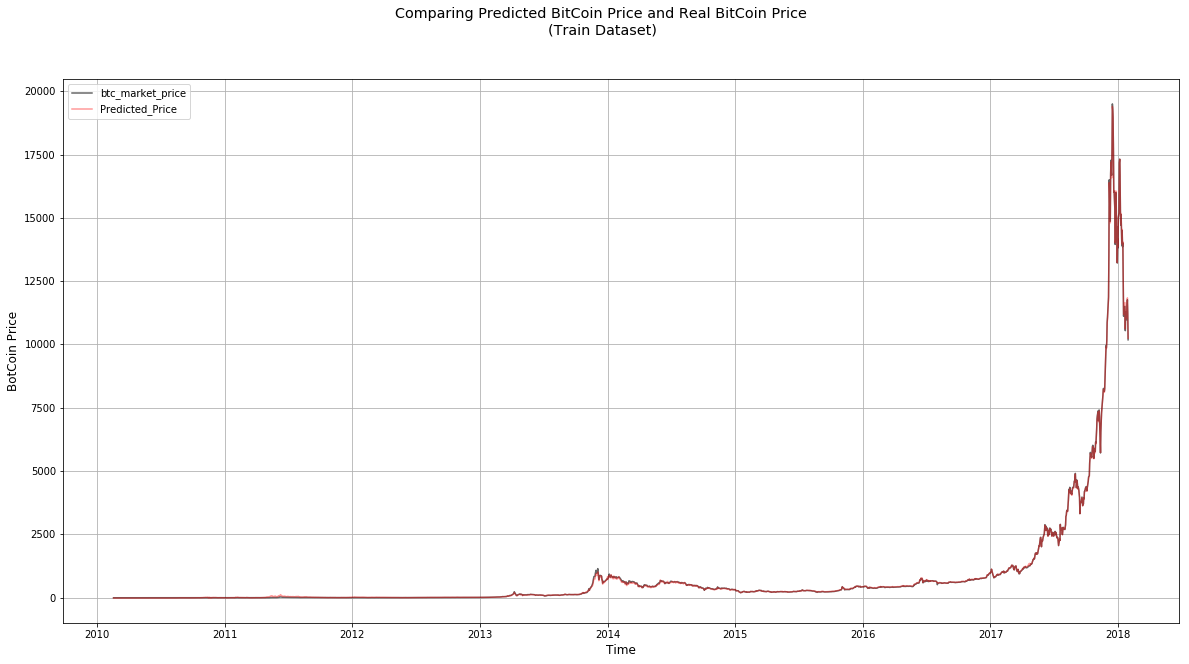

In [333]:
ycompare3=predict_compare(linlasso_pol2, Xtrain2_mms, ytrain2, 'Train Dataset')

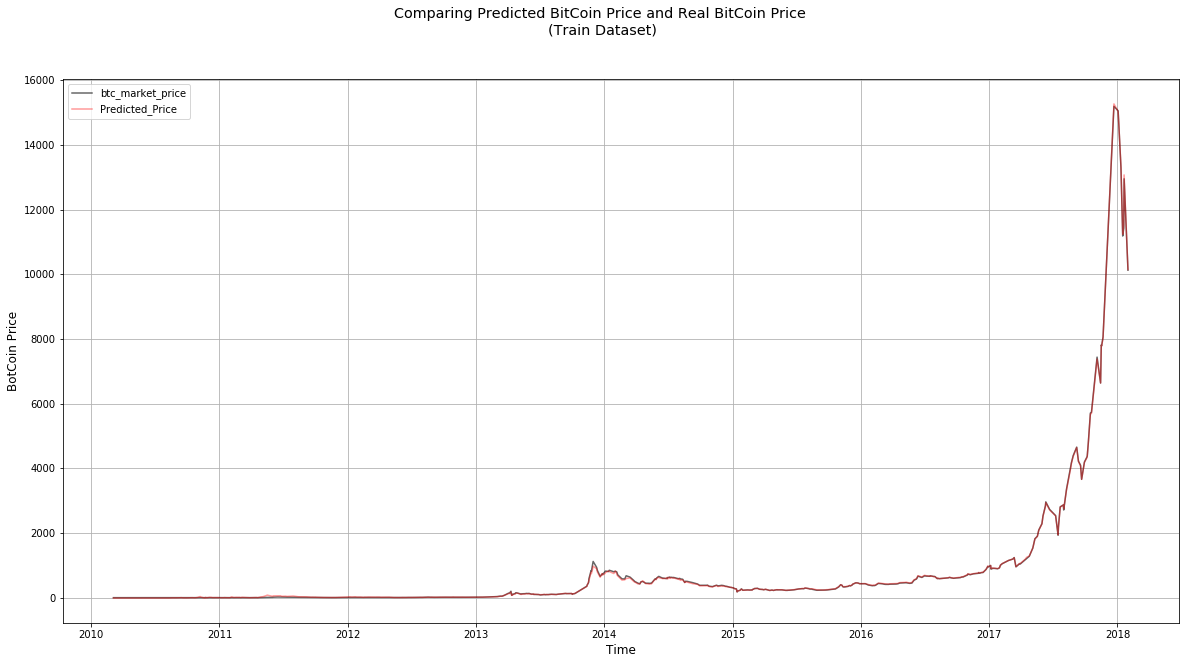

In [334]:
ycompare3b=predict_compare(linlasso_pol2, Xtest2_mms, ytest2, 'Train Dataset')

In [335]:
#To transform in polynomial the testset
X_poly_testset = polinomios2.fit_transform(test_reduced)
#To scale the testset
X_poly_testset_scaled=minmax_scaler.transform(X_poly_testset)

In [336]:
y_predict_testset_polynomial=predict_test(linlasso_pol2, X_poly_testset_scaled)
y_predict_testset_polynomial

,Date,predicted_BitCoin_Price
0,2018-02-01,9140.420297
1,2018-02-02,8999.680860
2,2018-02-03,9172.212528
3,2018-02-04,8557.414095
4,2018-02-05,6945.620159
5,2018-02-06,7762.562912
6,2018-02-07,8154.830489
7,2018-02-08,8316.814742
8,2018-02-09,8615.885675
9,2018-02-10,8398.307700


### 4.6 Support Vector Machine

### 4.6.1 Using GridSearch to find the best parameters for SVR

In [337]:
param_grid={'kernel':['linear' ],
            'C':[1,10,100,1000],
            'epsilon':[0,0.01,0.1,0.5]
}

grid_search=GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(Xtrain_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'epsilon': [0, 0.01, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [338]:
print('Best Parameters: {}'.format(grid_search.best_params_))
print('Best Score: {:.4f}'.format(grid_search.best_score_))
print('Best Estimator: {}'.format(grid_search.best_estimator_))

Best Parameters: {'C': 1000, 'epsilon': 0.5, 'kernel': 'linear'}
Best Score: 0.9988
Best Estimator: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


### 4.6.2 Working with chosen parameters in Support Vector Regression

#### Using the Best Parameters: {'C': 1000, 'epsilon': 0.01, 'kernel': 'linear'}  and train data set to build the model and using test data set to validate how good the model is.

In [339]:
svr=SVR(C=1000, epsilon=0.5, kernel='linear')
svr.fit(Xtrain_mms, ytrain)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [340]:
print('R-Sqaure Score (test): {:.4f}'.format(svr.score(Xtest_mms, ytest)))
print('Root Squared Mean Error (test): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(svr.predict(Xtest_mms), ytest))))

R-Sqaure Score (test): 0.9980
Root Squared Mean Error (test): 78.8530


### 4.6.3 Prediction in Support Vector Regression

##### Graph comparing real BitCion price and predicted BitCoin price using Support Vector Regression in Train Dataset  

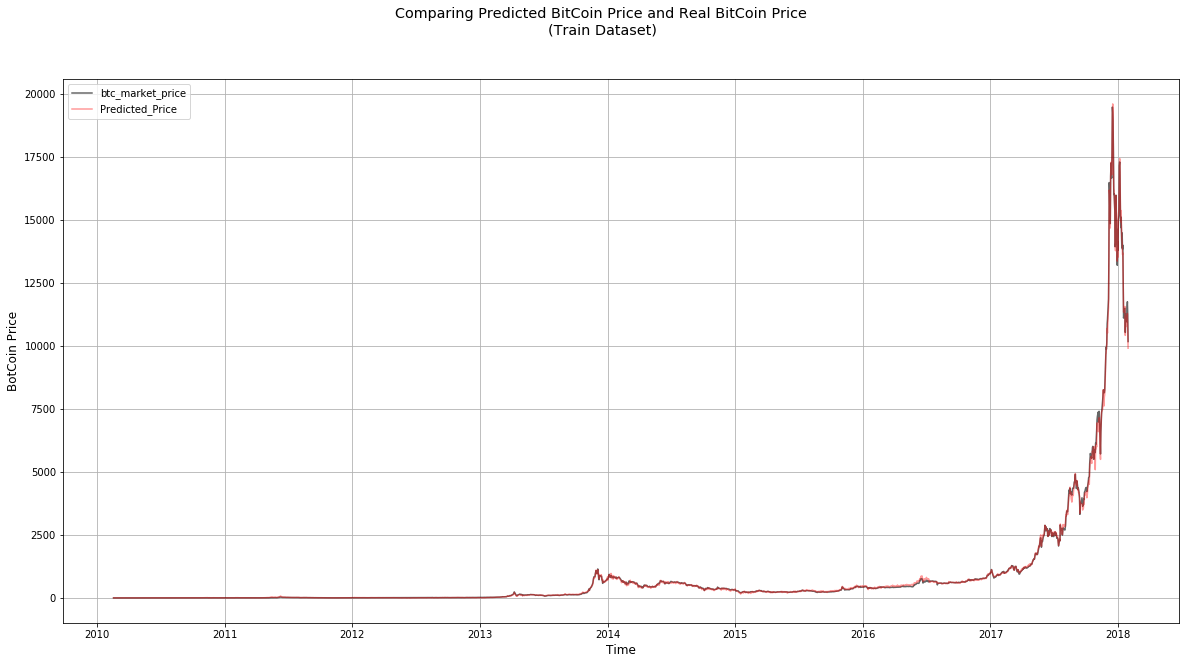

In [341]:
ycomparesvr=predict_compare(svr, Xtrain_mms, ytrain, 'Train Dataset')

##### Graph comparing real BitCion price and predicted BitCoin price using Support Vector Regression in Test Dataset  

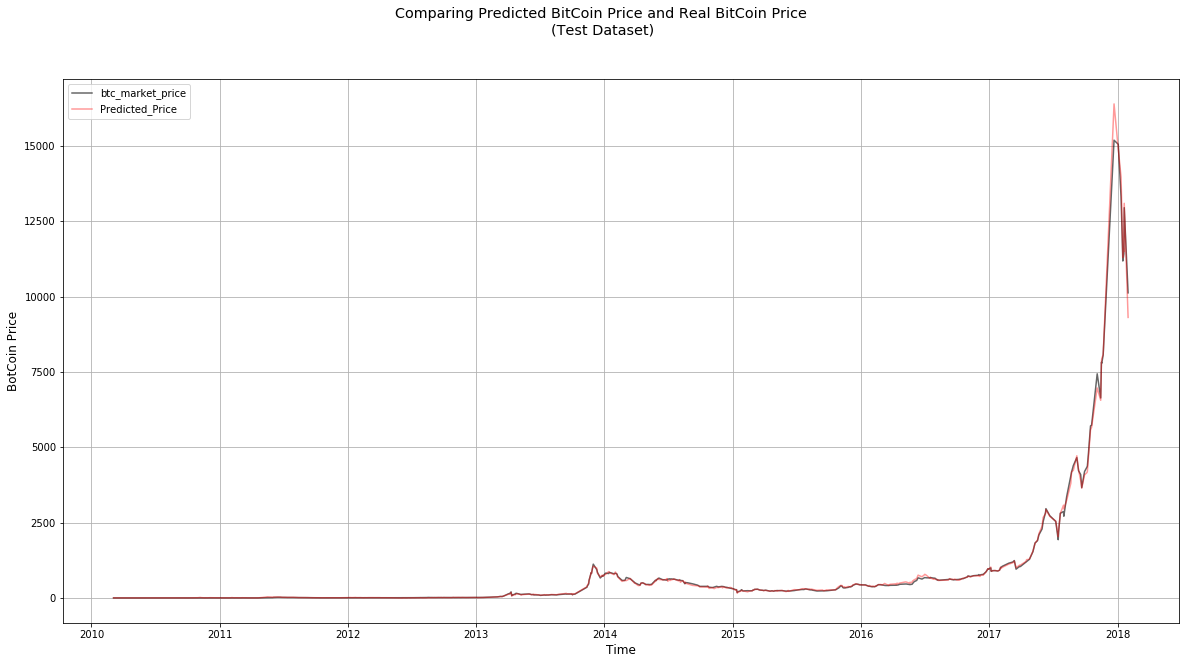

In [342]:
ycomparesvr2=predict_compare(svr, Xtest_mms, ytest, 'Test Dataset')

#### Predicting the values in "test_set" for support vector regression

In [343]:
y_predict_testset_svr=predict_test(svr, X_testset_mms)
y_predict_testset_svr

,Date,predicted_BitCoin_Price
0,2018-02-01,9011.164135
1,2018-02-02,9103.077411
2,2018-02-03,8816.585020
3,2018-02-04,8445.888695
4,2018-02-05,7050.764768
5,2018-02-06,7739.844727
6,2018-02-07,7779.754899
7,2018-02-08,7873.148075
8,2018-02-09,8117.815068
9,2018-02-10,7862.453066


### 4.6.4 Conclusion
#### C equals to 1000, epsilon equals to 0.01 and using 'linear' kernel are the best parameter for SVM model：
* R-Squared Score (test): 0.9980
* Root Mean Squared Error (test): 78.85

### 4.7 Kernelized Support Vector Machine

### 4.7.1 Using GridSearch to find the best parameters for Kernelized SVR

In [344]:
param_grid={'kernel':['poly', 'rbf', 'sigmoid'],
            'C':[1,10,100,1000],
            'epsilon':[0,0.01,0.1,0.5]
}
#'linear',
grid_search=GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(Xtrain_mms, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [1, 10, 100, 1000], 'epsilon': [0, 0.01, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [345]:
print('Best Parameters: {}'.format(grid_search.best_params_))
print('Best Score: {:.4f}'.format(grid_search.best_score_))
print('Best Estimator: {}'.format(grid_search.best_estimator_))

Best Parameters: {'C': 1000, 'epsilon': 0.5, 'kernel': 'rbf'}
Best Score: 0.9947
Best Estimator: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


### 4.7.2 Working with chosen parameters in Kernelized Support Vector Regression

#### Using the Best Parameters: {'C': 1000, 'epsilon': 0.5, 'kernel': 'rbf'}  and train data set to build the model and using test data set to validate how good the model is.

In [346]:
svr_kernel=SVR(C=1000, epsilon=0.5, kernel='rbf')
svr_kernel.fit(Xtrain_mms, ytrain)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [347]:
print('R-Square Score (test): {:.4f}'.format(svr_kernel.score(Xtest_mms, ytest)))
print('Root Squared Mean Error (test): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(svr_kernel.predict(Xtest_mms), ytest))))

R-Square Score (test): 0.9943
Root Squared Mean Error (test): 132.6043


### 4.7.3 Prediction in Kernelized Support Vector Regression

##### The graph of y, ypredicted for train data in Kernelized Support Vector Regression

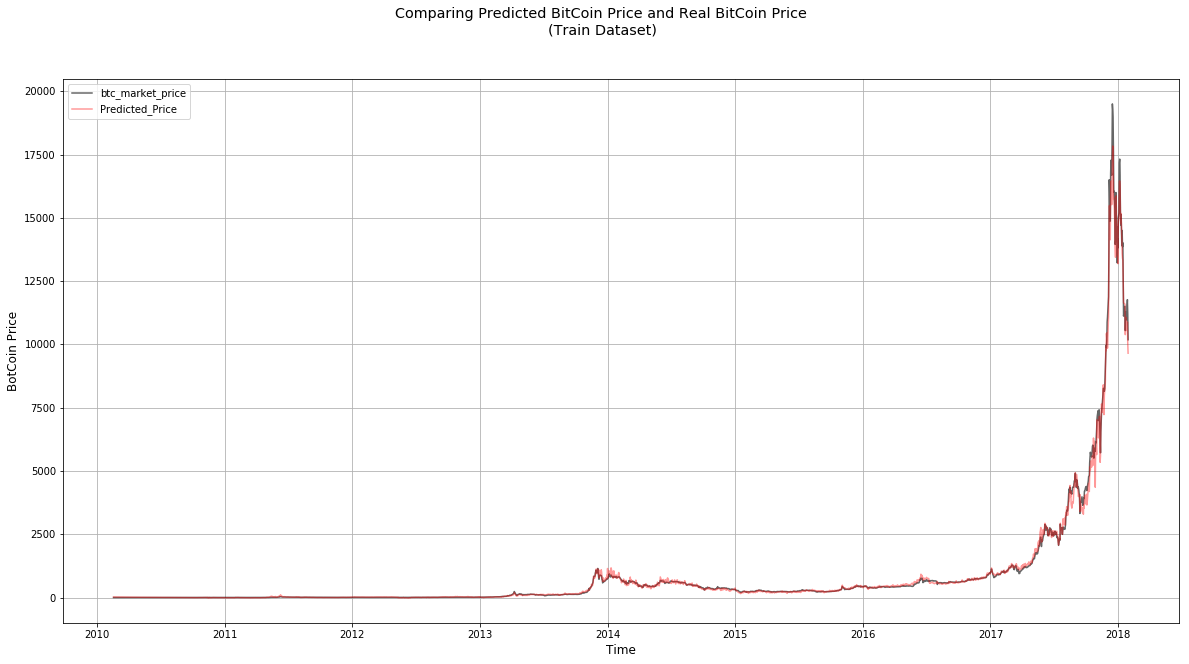

In [348]:
ycomparesvrkernel=predict_compare(svr_kernel, Xtrain_mms, ytrain, 'Train Dataset')

##### The graph of y, ypredicted for test data in Kernelized Support Vector Regression

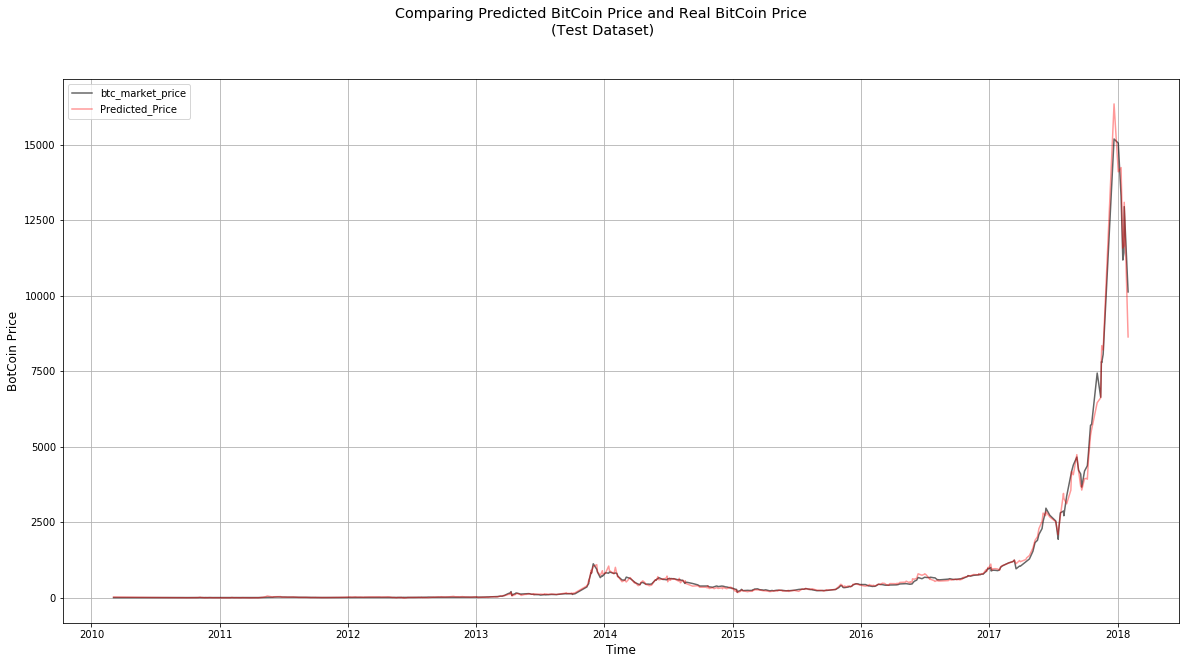

In [349]:
ycomparesvrkernel2=predict_compare(svr_kernel, Xtest_mms, ytest, 'Test Dataset')

#### Predicting the values in "test_set" for kernelized support vector regression

In [350]:
y_predict_testset_svrkernel=predict_test(svr_kernel, X_testset_mms)
y_predict_testset_svrkernel

,Date,predicted_BitCoin_Price
0,2018-02-01,9155.994597
1,2018-02-02,9630.720707
2,2018-02-03,8643.415142
3,2018-02-04,8682.896828
4,2018-02-05,7378.833747
5,2018-02-06,8026.022229
6,2018-02-07,7584.227029
7,2018-02-08,7719.009284
8,2018-02-09,7976.506693
9,2018-02-10,7440.110761


### 4.7.4 Conclusion
#### C equals to 1000, epsilon equals to 0.5 and using 'rbf' kernel are the best parameter for SVM model：
* R-Squared Score (test): 0.9943
* Root Mean Squared Error (test): 132.60

## 5. Comparing Models

### 5.1 Graphical comparison all models

##### Comparing predictions over training sets

In [351]:
allmodels_train=pd.concat([ycompare0['Predicted_y'], ycompare1['Predicted_y'], ycompare2['Predicted_y'], ycompare3['Predicted_y'], ycompareknn['Predicted_y'], 
                     ycomparesvr['Predicted_y'], ycomparesvrkernel['Predicted_y']], axis=1) 
allmodels_train["market_price"]=ycompare0.iloc[:,1]
allmodels_train["Date"]=ycompare0.iloc[:,0]
allmodels_train.columns=["Predicted_trainset_linear", 
          "Predicted_trainset_lasso", "Predicted_trainset_ridge",
          "Predicted_trainset_Polynomial", "Predicted_trainset_knn", 
          "Predicted_trainset_svr", "Predicted_trainset_svrkernel", "market_price", 'Date']
allmodels_train.set_index('Date', inplace=True)

In [352]:
allmodels_train.head()

,Predicted_trainset_linear,Predicted_trainset_lasso,Predicted_trainset_ridge,Predicted_trainset_Polynomial,Predicted_trainset_knn,Predicted_trainset_svr,Predicted_trainset_svrkernel,market_price
Date,,,,,,,,
2010-02-17,-17.592191,-12.446165,24.431056,-13.386073,0.0,-0.367062,22.559613,0.0
2010-02-18,-17.576652,-12.434748,24.309846,-13.381230,0.0,-0.369484,22.335019,0.0
2010-02-19,-17.570239,-12.429213,24.257491,-13.379478,0.0,-0.347505,22.178936,0.0
2010-02-20,-17.549142,-12.414581,24.095383,-13.372573,0.0,-0.374972,21.942586,0.0
2010-02-21,-17.534549,-12.403870,23.981580,-13.367948,0.0,-0.377536,21.734400,0.0


##### Comparing predictions over test sets

In [353]:
allmodels_test=pd.concat([ycompare0b['Predicted_y'], ycompare1b['Predicted_y'], ycompare2b['Predicted_y'], ycompare3b['Predicted_y'], 
                          ycompareknn2['Predicted_y'], ycomparesvr2['Predicted_y'], ycomparesvrkernel2['Predicted_y']], axis=1) 
allmodels_test["market_price"]=ycompare0b.iloc[:,1]
allmodels_test["Date"]=ycompare0b.iloc[:,0]
allmodels_test.columns=["Predicted_trainset_linear", 
          "Predicted_trainset_lasso", "Predicted_trainset_ridge",
          "Predicted_trainset_Polynomial", "Predicted_trainset_knn", 
          "Predicted_trainset_svr", "Predicted_trainset_svrkernel", "market_price", 'Date']
allmodels_test.set_index('Date', inplace=True)

In [354]:
allmodels_test.head()

,Predicted_trainset_linear,Predicted_trainset_lasso,Predicted_trainset_ridge,Predicted_trainset_Polynomial,Predicted_trainset_knn,Predicted_trainset_svr,Predicted_trainset_svrkernel,market_price
Date,,,,,,,,
2010-03-05,-17.379081,-12.290191,22.770417,-13.317042,0.0,-0.416758,19.588972,0.0
2010-03-07,-17.353622,-12.271674,22.572365,-13.308430,0.0,-0.425942,19.251734,0.0
2010-03-08,-17.348324,-12.267217,22.529449,-13.306707,0.0,-0.411011,19.138086,0.0
2010-03-09,-17.336894,-12.259020,22.440853,-13.302792,0.0,-0.418353,18.995917,0.0
2010-03-14,-17.289760,-12.224378,22.073159,-13.286589,0.0,-0.425322,18.353555,0.0


#### Comparing predictions over testset

In [355]:
date=pd.DataFrame(y_predict_testset_knn['Date'])
date=date.rename(columns={0:"Date"})

a=pd.DataFrame(y_predict_testset_knn['predicted_BitCoin_Price'])
a=a.rename(columns={'predicted_BitCoin_Price':"knn"})

b=pd.DataFrame(y_predict_testset_linear['predicted_BitCoin_Price'])
b=b.rename(columns={'predicted_BitCoin_Price':"linear"})

c=pd.DataFrame(y_predict_testset_lasso['predicted_BitCoin_Price'])
c=c.rename(columns={'predicted_BitCoin_Price':"lasso"})

d=pd.DataFrame(y_predict_testset_ridge['predicted_BitCoin_Price'])
d=d.rename(columns={'predicted_BitCoin_Price':"ridge"})

e=pd.DataFrame(y_predict_testset_polynomial['predicted_BitCoin_Price'])
e=e.rename(columns={'predicted_BitCoin_Price':"polynomial"})

f=pd.DataFrame(y_predict_testset_svr['predicted_BitCoin_Price'])
f=f.rename(columns={'predicted_BitCoin_Price':"svr"})

g=pd.DataFrame(y_predict_testset_svrkernel['predicted_BitCoin_Price'])
g=g.rename(columns={'predicted_BitCoin_Price':"svr_kernel"})

testset_all=pd.concat([date,a,b,c,d,e,f,g], axis=1)
testset_all.set_index('Date', inplace=True)

In [356]:
testset_all

,knn,linear,lasso,ridge,polynomial,svr,svr_kernel
Date,,,,,,,
2018-02-01,9801.456912,9169.140120,9152.619220,9132.860359,9140.420297,9011.164135,9155.994597
2018-02-02,10909.616110,9041.275405,9018.883914,9416.288306,8999.680860,9103.077411,9630.720707
2018-02-03,11054.142223,9177.652722,9187.688252,8821.224350,9172.212528,8816.585020,8643.415142
2018-02-04,11158.182780,8568.007140,8578.248496,8639.645281,8557.414095,8445.888695,8682.896828
2018-02-05,8028.284718,6956.379564,6961.224079,7294.946777,6945.620159,7050.764768,7378.833747
2018-02-06,8028.284718,7788.188157,7777.569685,7918.737215,7762.562912,7739.844727,8026.022229
2018-02-07,7092.601617,8163.490891,8162.699666,7790.774095,8154.830489,7779.754899,7584.227029
2018-02-08,9801.456912,8330.437029,8328.289836,7937.184439,8316.814742,7873.148075,7719.009284
2018-02-09,9801.456912,8632.617963,8629.674419,8126.387379,8615.885675,8117.815068,7976.506693


### 5.2 Comparing Mean Square Errors

In [357]:
models=[]
models.append(('KNN', knn))
models.append(('Linear_Regression', linreg))
models.append(('LinLasso', linlasso))
models.append(('LinRidge', linridge))
models.append(('Polynomial_Regression', linlasso_pol2))
models.append(('SVR', svr))
models.append(('Kernel_SVR', svr_kernel))


In [358]:
# Evaluate each model in turn
results=[]
names=[]
meanSquaredError=[]
i=0
CV_testdata=pd.DataFrame(columns=['Algoruthm','Score_mean','Score_std','MSE'])
for name, model in models:
    kfold=KFold(n_splits=10, random_state=10)
    cv_results=cross_val_score(model, Xtest_mms, ytest, cv=kfold, scoring='r2')
    MSE=cross_val_score(model, Xtest_mms, ytest, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    meanSquaredError.append(abs(MSE))
    names.append(name)
    MSE=abs(MSE.mean())
    mean=cv_results.mean()
    std=cv_results.std()
    CV_testdata.loc[i]=[name,mean,std,MSE]
    i=i+1
    
    

In [359]:
CV_testdata

,Algoruthm,Score_mean,Score_std,MSE
0,KNN,0.982072,0.012415,50430.655335
1,Linear_Regression,0.999710,0.000311,421.960946
2,LinLasso,0.999682,0.000350,486.180435
3,LinRidge,0.975769,0.020787,42452.786307
4,Polynomial_Regression,0.999682,0.000350,486.180435
5,SVR,0.980042,0.012220,58589.358172
6,Kernel_SVR,0.786850,0.078351,825788.311976


[Text(0,0,'KNN'),
 Text(0,0,'Linear_Regression'),
 Text(0,0,'LinLasso'),
 Text(0,0,'LinRidge'),
 Text(0,0,'Polynomial_Regression'),
 Text(0,0,'SVR'),
 Text(0,0,'Kernel_SVR')]

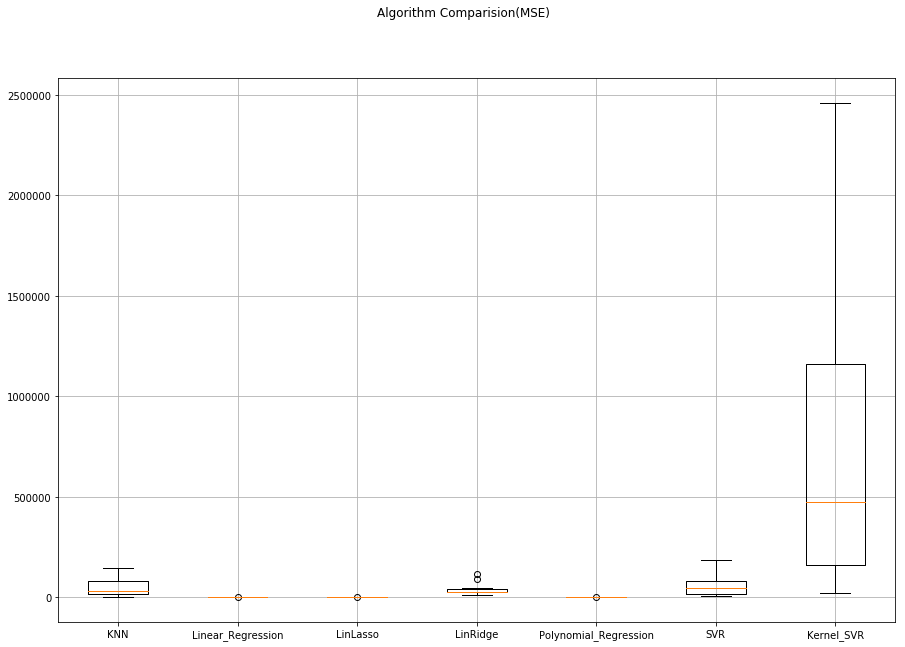

In [360]:
fig=plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparision(MSE)')
ax=fig.add_subplot(111)
plt.boxplot(meanSquaredError)
plt.grid(True)
ax.set_xticklabels(names)

### 5.3 Comparing R Squared Value 

[Text(0,0,'KNN'),
 Text(0,0,'Linear_Regression'),
 Text(0,0,'LinLasso'),
 Text(0,0,'LinRidge'),
 Text(0,0,'Polynomial_Regression'),
 Text(0,0,'SVR'),
 Text(0,0,'Kernel_SVR')]

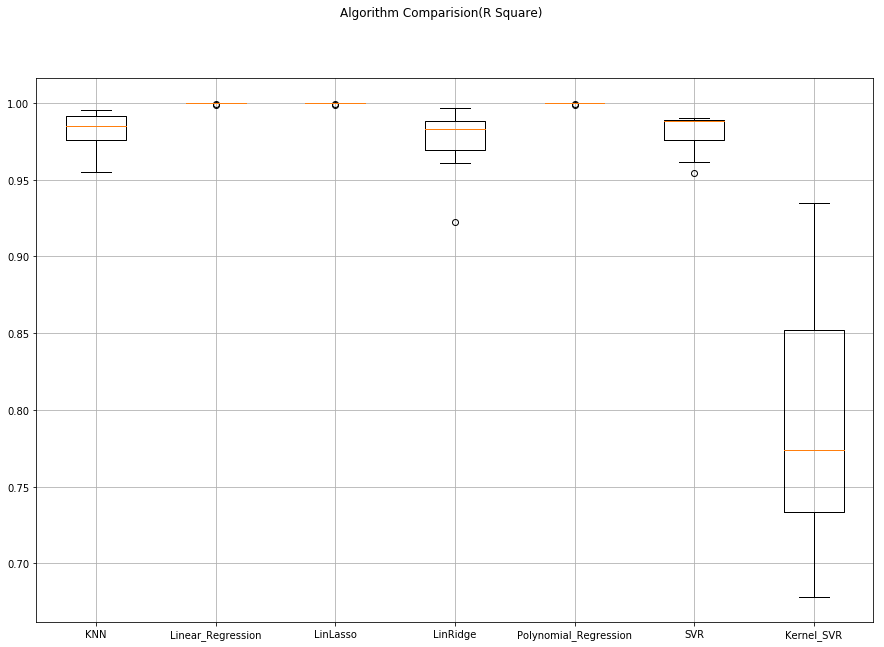

In [361]:
fig=plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparision(R Square)')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.grid(True)
ax.set_xticklabels(names)

## 6. Based on two box plots above, we consider linear regression model preformances better.
#### Below is BitCoin Price predicted by Linear Regression using data in test.csv 

In [362]:
minmax_scaler=MinMaxScaler()
X_mms=minmax_scaler.fit_transform(X)
#Scaling dataframe: "test"
X_testset_mms=minmax_scaler.transform(test_reduced)

In [363]:
linear = LinearRegression().fit(X_mms, y)
y_test_predicted=predict_test(linear, X_testset_mms)
y_test_predicted

,Date,predicted_BitCoin_Price
0,2018-02-01,9167.401820
1,2018-02-02,9036.514769
2,2018-02-03,9179.572313
3,2018-02-04,8567.215815
4,2018-02-05,6951.873497
5,2018-02-06,7785.471105
6,2018-02-07,8165.357266
7,2018-02-08,8333.458941
8,2018-02-09,8636.832945
9,2018-02-10,8395.492522


## 7. Conclusions

After analyzing those different models we can see that the best performance is Linear Regression.

Even though, this require further analysis. There are some aspects of the data that can change the resuts:

1) This dataframe has time series behaviour. We could apply other statistical methods such as Vector Autoregressive.

2) The dataset has another behaviour in year 2017. Therefore, we could analyze this new period. Some effect of the expectations of people could have changed the dynamic of the data after 2017.